### Simple Linear Regression: Viton 1610 Prototype Bands, PolySBS Bands, and Viton 1610 Dogbones Tangential Modulus
### Author: Hannah Nevel

In [1]:
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
#importing data
band_data1 = pd.read_excel(r"C:\Users\HannahNevel\OneDrive - STF Technologies LLC\Desktop\DOE RheoSurfR\stressstrain_data_averages.xlsx",sheet_name='Dogbones - first tests', skiprows = range(1,33), nrows=122)
band_data2 = pd.read_excel(r"C:\Users\HannahNevel\OneDrive - STF Technologies LLC\Desktop\DOE RheoSurfR\stressstrain_data_averages.xlsx",sheet_name='Dogbones - first tests',  skiprows = range(1,17), nrows=84)
band_data3 = pd.read_excel(r"C:\Users\HannahNevel\OneDrive - STF Technologies LLC\Desktop\DOE RheoSurfR\stressstrain_data_averages.xlsx",sheet_name='Dogbones - first tests',  skiprows = range(1,32), nrows=70)

Viton_data_nopostcure = pd.read_excel(r"C:\Users\HannahNevel\OneDrive - STF Technologies LLC\Desktop\DOE RheoSurfR\stressstrain_data_averages.xlsx",sheet_name='Dogbones - first tests', skiprows = range(1,28), nrows=95)
Viton_data_postcure = pd.read_excel(r"C:\Users\HannahNevel\OneDrive - STF Technologies LLC\Desktop\DOE RheoSurfR\stressstrain_data_averages.xlsx",sheet_name='Dogbones - first tests', skiprows = range(1,35), nrows=90)
PolySBS_data = pd.read_excel(r"C:\Users\HannahNevel\OneDrive - STF Technologies LLC\Desktop\DOE RheoSurfR\stressstrain_data_averages.xlsx",sheet_name='Dogbones - first tests', skiprows = range(1,64), nrows=70)

pband_strain_data1 = pd.DataFrame(band_data1, columns=['Specimen 1 AVG Strain (mm/mm)'])
pband_stress_data1 = pd.DataFrame(band_data1, columns=['Specimen 1 AVG Stress (Mpa)'])

pband_strain_data2 = pd.DataFrame(band_data2, columns=['Specimen 2 AVG Strain (mm/mm)'])
pband_stress_data2 = pd.DataFrame(band_data2, columns=['Specimen 2 AVG Stress (Mpa)'])

pband_strain_data3 = pd.DataFrame(band_data3, columns=['Specimen 3 AVG Strain (mm/mm)'])
pband_stress_data3 = pd.DataFrame(band_data3, columns=['Specimen 3 AVG Stress (Mpa)'])

viton_nocure_straindata = pd.DataFrame(Viton_data_nopostcure, columns=['Viton 1610 nopostcure: Average Strain (mm/mm)']).dropna()
viton_nocure_stressdata = pd.DataFrame(Viton_data_nopostcure, columns=['Viton 1610 nopostcure: Average Stress (Mpa)']).dropna()

viton_cure_straindata = pd.DataFrame(Viton_data_postcure, columns=['Viton 1610 postcure: Average Strain (mm/mm)']).dropna()
viton_cure_stressdata = pd.DataFrame(Viton_data_postcure, columns=['Viton 1610 postcure: Average Stress (Mpa)']).dropna()

polysbs_straindata =  pd.DataFrame(PolySBS_data, columns=['PolySBS: Average Strain (mm/mm)']).dropna()
polysbs_stressdata = pd.DataFrame(PolySBS_data, columns=['PolySBS: Average Stress (Mpa)']).dropna()

#convert to array
pband_strain1_array = pband_strain_data1.to_numpy()
pband_stress1_array = pband_stress_data1.to_numpy()

pband_strain2_array = pband_strain_data2.to_numpy()
pband_stress2_array = pband_stress_data2.to_numpy()

pband_strain3_array = pband_strain_data3.to_numpy()
pband_stress3_array = pband_stress_data3.to_numpy()

viton_nocure_straindata_array = viton_nocure_straindata.to_numpy()
viton_nocure_stressdata_array = viton_nocure_stressdata.to_numpy()

viton_cure_straindata_array = viton_cure_straindata.to_numpy()
viton_cure_stressdata_array = viton_cure_stressdata.to_numpy()

polysbs_straindata_array = polysbs_straindata.to_numpy()
polysbs_stressdata_array = polysbs_stressdata.to_numpy() 

In [17]:


#calculate tangential modulus (simple linear regression) 
def estimate_coef(x,y):
    
    n = np.size(x)

    m_x = np.mean(x)
    m_y = np.mean(y)

    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    slope = SS_xy / SS_xx
    y_int = m_y - slope*m_x

    return (y_int, slope)


def main():
    band_x1 = pband_strain1_array
    band_y1 = pband_stress1_array

    band_x2 = pband_strain2_array
    band_y2 = pband_stress2_array

    band_x3 = pband_strain3_array
    band_y3 = pband_stress3_array

    viton_nocure_x = viton_nocure_straindata_array
    viton_nocure_y = viton_nocure_stressdata_array

    viton_cure_x = viton_cure_straindata_array
    viton_cure_y = viton_cure_stressdata_array

    polysbs_x = polysbs_straindata_array
    polysbs_y = polysbs_stressdata_array

    b = estimate_coef(band_x1,band_y1)
    c = estimate_coef(band_x2,band_y2)
    d = estimate_coef(band_x3,band_y3)

    e = estimate_coef(viton_nocure_x,viton_nocure_y)
    f = estimate_coef(viton_cure_x, viton_cure_y)
    g = estimate_coef(polysbs_x,polysbs_y)
    
    print("Estimated coefficients band Specimen 1:\ny_int = {}  \nslope = {}".format(b[0], b[1]))
    print("Estimated coefficients band Specimen 2:\ny_int = {}  \nslope = {}".format(c[0], c[1]))
    print("Estimated coefficients band Specimen 3:\ny_int = {}  \nslope = {}".format(d[0], d[1]))

    print("Estimated coefficients Viton Dogbone No Postcure:\ny_int = {}  \nslope = {}".format(e[0], e[1]))
    print("Estimated coefficients Viton Dogbone Postcure:\ny_int = {}  \nslope = {}".format(f[0], f[1]))
    print("Estimated coefficients PolySBS:\ny_int = {}  \nslope = {}".format(g[0], g[1]))

    plt.scatter(band_x1,band_y1,color = "k", marker = "o", s=20, label = 'Prototype Band Specimen 1')
    plt.scatter(band_x2,band_y2,color = "g", marker = "x", s=20, label = 'Prototype Band Specimen 2')
    plt.scatter(band_x3,band_y3,color = "b", marker = "v", s=20, label = 'Prototype Band Specimen 3')
    plt.scatter(viton_nocure_x,viton_nocure_y,color = "c", marker = ".", s=32, label = 'Dogbone No Postcure')
    plt.scatter(viton_cure_x, viton_cure_y,color = "m", marker = "s", s=20, label = 'Dogbone Postcure')
    plt.scatter(polysbs_x,polysbs_y,color = "y", marker = "h", s=20, label = 'PolySBS')

    y_predict1 = b[0] + b[1]*band_x1
    y_predict2 = c[0] + c[1]*band_x2
    y_predict3 = d[0] + d[1]*band_x3

    y_predict4 = e[0] + e[1]*viton_nocure_x
    y_predict5 = f[0] + f[1]*viton_cure_x
    y_predict6 = g[0] + g[1]*polysbs_x

    plt.plot(band_x1,y_predict1,color ="r")
    plt.plot(band_x2,y_predict2,color ="r")
    plt.plot(band_x3,y_predict3,color ="r")
    plt.plot(viton_nocure_x,y_predict4,color ="r")
    plt.plot(viton_cure_x,y_predict5,color ="r")
    plt.plot(polysbs_x,y_predict6,color ="r")

    plt.legend(loc="upper right")
    plt.title('Tangential Modulus for Prototype Bands, Dogbones and PolySBS Band')
    plt.xlabel('Strain (mm/mm)')
    plt.ylabel('Stress (MPa)')
    plt.xlim(0,3.0)
    plt.ylim(0,1.0)
    plt.grid

    plt.show()
    




In [18]:
band_x1 = pband_strain1_array
band_y1 = pband_stress1_array

band_x2 = pband_strain2_array
band_y2 = pband_stress2_array

band_x3 = pband_strain3_array
band_y3 = pband_stress3_array

viton_nocure_x = viton_nocure_straindata_array
viton_nocure_y = viton_nocure_stressdata_array

viton_cure_x = viton_cure_straindata_array
viton_cure_y = viton_cure_stressdata_array

polysbs_x = polysbs_straindata_array
polysbs_y = polysbs_stressdata_array

b = estimate_coef(band_x1,band_y1)
c = estimate_coef(band_x2,band_y2)
d = estimate_coef(band_x3,band_y3)

e = estimate_coef(viton_nocure_x,viton_nocure_y)
f = estimate_coef(viton_cure_x, viton_cure_y)
g = estimate_coef(polysbs_x,polysbs_y)


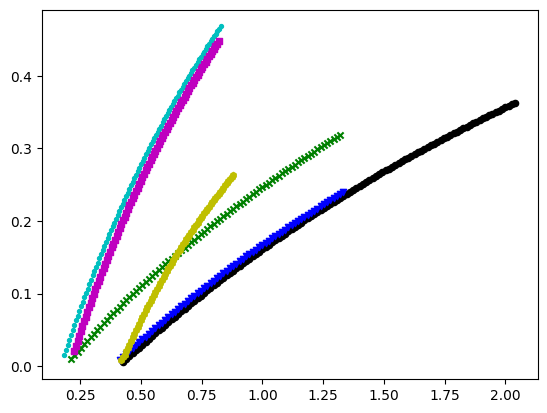

In [19]:

plt.scatter(band_x1,band_y1,color = "k", marker = "o", s=20, label = 'Prototype Band Specimen 1')
plt.scatter(band_x2,band_y2,color = "g", marker = "x", s=20, label = 'Prototype Band Specimen 2')
plt.scatter(band_x3,band_y3,color = "b", marker = "v", s=20, label = 'Prototype Band Specimen 3')
plt.scatter(viton_nocure_x,viton_nocure_y,color = "c", marker = ".", s=32, label = 'Dogbone No Postcure')
plt.scatter(viton_cure_x, viton_cure_y,color = "m", marker = "s", s=20, label = 'Dogbone Postcure')
plt.scatter(polysbs_x,polysbs_y,color = "y", marker = "h", s=20, label = 'PolySBS')


In [20]:
data = [b,c,d,e,f,g]
data

[(-0.06666475691440765, 0.21925622459145855),
 (-0.03127113639851195, 0.2749748738441574),
 (-0.08624537898494183, 0.24992045135917068),
 (-0.08249751503417757, 0.6930275844127417),
 (-0.1112867872306802, 0.708261853179865),
 (-0.21211524278476135, 0.5537234062676001)]

In [21]:
slope_arr = []

In [22]:
specimennames = ['Prototype Band 1','Prototype Band 2', 'Prototype Band 3','Dogbone No Postcure','Dogbone Postcure','PolySBS Band']

In [23]:
for point in data:
    slope_arr.append(point[1])
slope_arr

[0.21925622459145855,
 0.2749748738441574,
 0.24992045135917068,
 0.6930275844127417,
 0.708261853179865,
 0.5537234062676001]

In [24]:
d = {'Specimen Name':specimennames,'Tangential Modulus':slope_arr}
pd.DataFrame(data=d)

,Specimen Name,Tangential Modulus
0,Prototype Band 1,0.219256
1,Prototype Band 2,0.274975
2,Prototype Band 3,0.249920
3,Dogbone No Postcure,0.693028
4,Dogbone Postcure,0.708262
5,PolySBS Band,0.553723


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


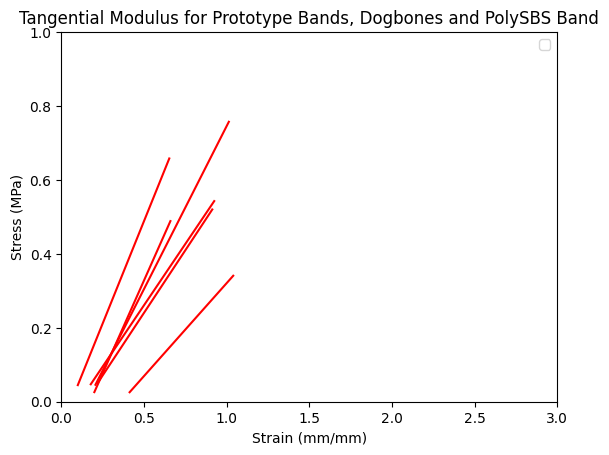

In [20]:

y_predict1 = b[0] + b[1]*band_x1
y_predict2 = c[0] + c[1]*band_x2
y_predict3 = d[0] + d[1]*band_x3

y_predict4 = e[0] + e[1]*viton_nocure_x
y_predict5 = f[0] + f[1]*viton_cure_x
y_predict6 = g[0] + g[1]*polysbs_x

plt.plot(band_x1,y_predict1,color ="r")
plt.plot(band_x2,y_predict2,color ="r")
plt.plot(band_x3,y_predict3,color ="r")
plt.plot(viton_nocure_x,y_predict4,color ="r")
plt.plot(viton_cure_x,y_predict5,color ="r")
plt.plot(polysbs_x,y_predict6,color ="r")

plt.legend(loc="upper right")
plt.title('Tangential Modulus for Prototype Bands, Dogbones and PolySBS Band')
plt.xlabel('Strain (mm/mm)')
plt.ylabel('Stress (MPa)')
plt.xlim(0,3.0)
plt.ylim(0,1.0)
plt.grid


plt.show()

Estimated coefficients band Specimen 1:
y_int = -0.13643576821101433  
slope = 0.8819753406324754
Estimated coefficients band Specimen 2:
y_int = -0.0658458536823826  
slope = 1.1082811392494047
Estimated coefficients band Specimen 3:
y_int = -0.1752926798328313  
slope = 1.0060520760255318
Estimated coefficients Viton Dogbone No Postcure:
y_int = -0.07104634393462184  
slope = 0.6636072308276368
Estimated coefficients Viton Dogbone Postcure:
y_int = -0.09843980423055015  
slope = 0.6772736583440535
Estimated coefficients PolySBS:
y_int = -0.18225151390890817  
slope = 0.5029829030812769


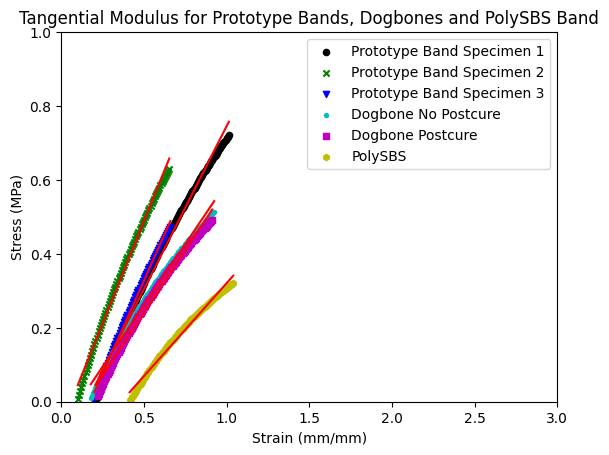

In [34]:
if __name__ == "__main__":
    main()
